In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set();

In [2]:
url = 'C:/Users/AKINTOLA/Downloads/fake_job_postings.csv'
df = pd.read_csv(url)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


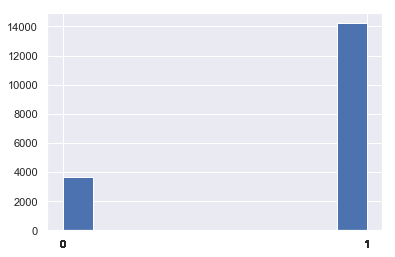

In [3]:
plt.hist(df['has_company_logo'])
plt.xticks(df['has_company_logo'].values)
plt.show()

In [4]:
df['fraudulent'].unique()

array([0, 1], dtype=int64)

## selecting categorical features in dataset 

In [5]:
categorical_features = df.select_dtypes(include = ['object'])
categorical_features.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider


## checking for null values in the categorical features

In [6]:
categorical_features.isna().sum() / len(df)

title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
dtype: float64

## Taking a better look at the data through its Transpose

In [7]:
categorical_features.T

,0,1,2,3,4,5,6,7,8,9,...,17870,17871,17872,17873,17874,17875,17876,17877,17878,17879
title,Marketing Intern,Customer Service - Cloud Video Production,Commissioning Machinery Assistant (CMA),Account Executive - Washington DC,Bill Review Manager,Accounting Clerk,Head of Content (m/f),Lead Guest Service Specialist,HP BSM SME,Customer Service Associate - Part Time,...,Senior Financial Analyst (Retail),Water Truck Driver,Product Manager,Recruiting Coordinator,JavaScript Developer,Account Director - Distribution,Payroll Accountant,Project Cost Control Staff Engineer - Cost Con...,Graphic Designer,Web Application Developers
location,"US, NY, New York","NZ, , Auckland","US, IA, Wever","US, DC, Washington","US, FL, Fort Worth","US, MD,","DE, BE, Berlin","US, CA, San Francisco","US, FL, Pensacola","US, AZ, Phoenix",...,"US, CA, Gardena","US, PA, Waynesburg","US, CA, San Francisco","US, NC, Charlotte","US, ,","CA, ON, Toronto","US, PA, Philadelphia","US, TX, Houston","NG, LA, Lagos","NZ, N, Wellington"
department,Marketing,Success,NaN,Sales,NaN,NaN,ANDROIDPIT,NaN,NaN,NaN,...,NaN,NaN,Product Development,NaN,NaN,Sales,Accounting,NaN,NaN,Engineering
salary_range,NaN,NaN,NaN,NaN,NaN,NaN,20000-28000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80000-100000,NaN,NaN,NaN,NaN,NaN
company_profile,"We're Food52, and we've created a groundbreaki...","90 Seconds, the worlds Cloud Video Production ...",Valor Services provides Workforce Solutions th...,Our passion for improving quality of life thro...,SpotSource Solutions LLC is a Global Human Cap...,NaN,"Founded in 2009, the Fonpit AG rose with its i...",Airenvy’s mission is to provide lucrative yet ...,Solutions3 is a woman-owned small business who...,"Novitex Enterprise Solutions, formerly Pitney ...",...,PROSULTING IS PEOPLE The ProSulting difference...,Valor Services provides Workforce Solutions th...,Flite delivers ad innovation at scale to the w...,NaN,NaN,Vend is looking for some awesome new talent to...,WebLinc is the e-commerce platform and service...,We Provide Full Time Permanent Positions for m...,NaN,Vend is looking for some awesome new talent to...
description,"Food52, a fast-growing, James Beard Award-winn...",Organised - Focused - Vibrant - Awesome!Do you...,"Our client, located in Houston, is actively se...",THE COMPANY: ESRI – Environmental Systems Rese...,JOB TITLE: Itemization Review ManagerLOCATION:...,Job OverviewApex is an environmental consultin...,Your Responsibilities: Manage the English-spea...,Who is Airenvy?Hey there! We are seasoned entr...,Implementation/Configuration/Testing/Training ...,The Customer Service Associate will be based i...,...,We are activity searching for a Senior Financi...,Requires skilled work in operating commercial ...,Flite's SaaS display ad platform fuels the wor...,RESPONSIBILITIES:Will facilitate the recruitin...,"Sr, JavaScript Developer Experience : 4-10 yea...",Just in case this is the first time you’ve vis...,The Payroll Accountant will focus primarily on...,Experienced Project Cost Control Staff Enginee...,Nemsia Studios is looking for an experienced v...,Who are we?Vend is an award winning web based ...
requirements,Experience with content management systems a m...,What we expect from you:Your key responsibilit...,Implement pre-commissioning and commissioning ...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",QUALIFICATIONS:RN license in the State of Texa...,NaN,Your Know-How: ...,"Experience with CRM software, live chat, and p...",MUST BE A US CITIZEN.An active TS/SCI clearanc...,Minimum Requirements:Minimum of 6 months custo...,...,Must have a minimum of 3 + years in Financial ...,GED or diploma required.Requires minimum of on...,BA/BS in Computer Science or a related technic...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,To ace this role you:Will eat comprehensive St...,- B.A. or B.S. in Accounting- Desire to have f...,At least 12 years professional experience.Abil...,1. Must be fluent in the latest versions of Co...,We want to hear fr

## Retrieving numerical features in the dataset

In [8]:
numerical_features = df.select_dtypes(include = ['float64', 'int64'])
numerical_features.head()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
0,1,0,1,0,0
1,2,0,1,0,0
2,3,0,1,0,0
3,4,0,1,0,0
4,5,0,1,1,0


## Checking for null values in the numerical feature

In [9]:
numerical_features.T

,0,1,2,3,4,5,6,7,8,9,...,17870,17871,17872,17873,17874,17875,17876,17877,17878,17879
job_id,1,2,3,4,5,6,7,8,9,10,...,17871,17872,17873,17874,17875,17876,17877,17878,17879,17880
telecommuting,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
has_company_logo,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,0,0,1
has_questions,0,0,0,0,1,0,1,1,1,0,...,1,1,0,0,0,1,1,0,1,1
fraudulent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data cleaning by replacing all NaN values

In [10]:
categorical_features = categorical_features.fillna('unfilled')

In [11]:
categorical_features.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

##  Text cleaning by removing unwanted symbols in text

In [12]:
import re
from nltk.corpus import stopwords
def preprocessor(text):
    text = re.sub('<[^>]*>(?::|;|=)(-,.:)(?:-)?(?:\)|\(|D|P)', '', text)
    text = re.sub('[\W]+', ' ', text)
    stop = stopwords.words('english')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized


## Code that retrieves individual words from the categorical features, then creating a pandas Series for it.

In [14]:
#preprocessor(categorical_features.loc[3, 'title'])
for q in categorical_features.columns:
    preprocessor(categorical_features.loc[0, q][0:])
    for i in preprocessor(categorical_features.loc[0, q][0:]):
        b = {'name': i}
        i = pd.Series(b)

## Appending it to the categorical features

In [15]:
categorical_features = categorical_features[q].append(i)

## resetting the index of both categorical features and numerical features

In [16]:
numerical_features.reset_index(drop = True, inplace = True)
categorical_features.reset_index(drop = True, inplace = True)

## Concatenating both features ttogether to a single feature

In [17]:
df = pd.concat([numerical_features, categorical_features], axis = 1)

## Scaling and using LabelEncoder to reduce overfitting and also transform column respectively

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
ss = StandardScaler()
df.iloc[:,-1] = le.fit_transform(df.iloc[:,-1])
df.iloc[:,-1] = ss.fit_transform(np.array(df.iloc[:,-1]).reshape(-1,1))

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [28]:
df.head(10)

,job_id,telecommuting,has_company_logo,has_questions,fraudulent,0
0,1.0,0.0,1.0,0.0,0.0,-0.145411
1,2.0,0.0,1.0,0.0,0.0,-1.352478
2,3.0,0.0,1.0,0.0,0.0,1.061655
3,4.0,0.0,1.0,0.0,0.0,0.578828
4,5.0,0.0,1.0,1.0,0.0,-0.628238
5,6.0,0.0,0.0,0.0,0.0,1.061655
6,7.0,0.0,1.0,1.0,0.0,-0.306354
7,8.0,0.0,1.0,1.0,0.0,1.061655
8,9.0,0.0,1.0,1.0,0.0,1.061655
9,10.0,0.0,1.0,0.0,0.0,-1.352478


In [30]:
df.iloc[:,-1].head()

0   -0.145411
1   -1.352478
2    1.061655
3    0.578828
4   -0.628238
Name: 0, dtype: float64

##  Using FactorPlot to show how some features determines if the job post was fradulent or not
## 1 depicts fradulent while 0 depicts not_fradulent. The degree a job post been fradulent is shown

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


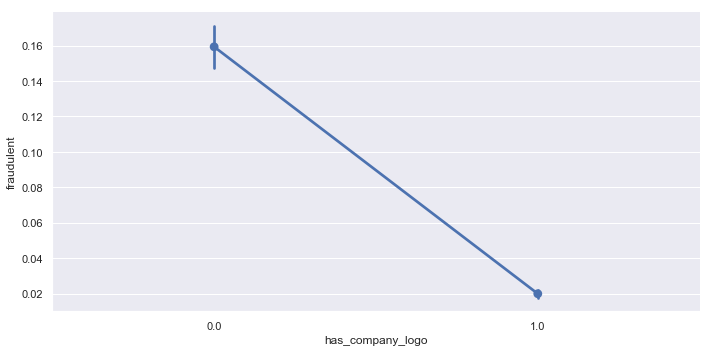

In [31]:
axes = sns.factorplot('has_company_logo','fraudulent', 
                      data=df, aspect = 2.0, )

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


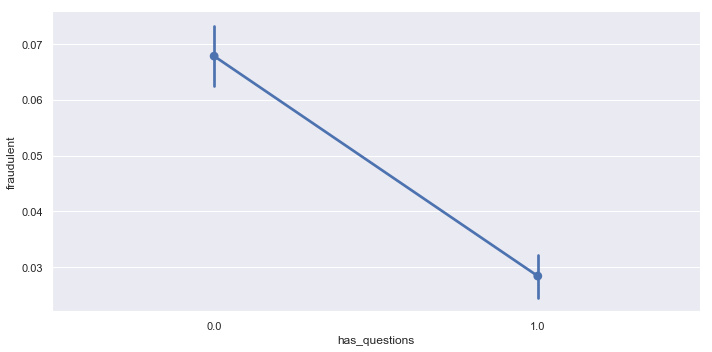

In [32]:
axes = sns.factorplot('has_questions','fraudulent', 
                      data=df, aspect = 2.0, )

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


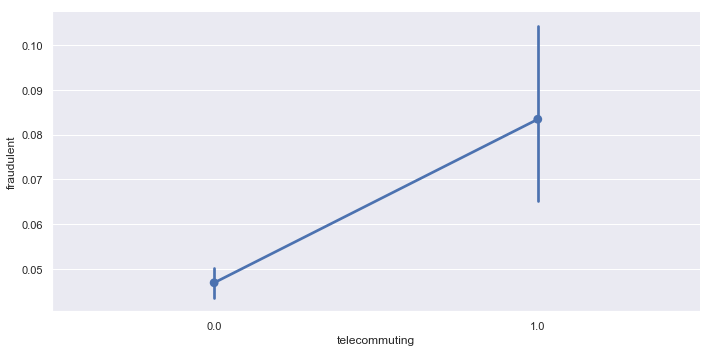

In [33]:
axes = sns.factorplot('telecommuting','fraudulent', 
                      data=df, aspect = 2.0, )

## Replacing NaN values in numerical features

In [61]:
df['telecommuting'] = df['telecommuting'].fillna(method='ffill')

In [62]:
df['has_company_logo'] = df['has_company_logo'].fillna(method='ffill')

In [63]:
df['has_questions'] = df['has_questions'].fillna(method='ffill')

In [64]:
df['fraudulent'] = df['fraudulent'].fillna(method='ffill')

In [65]:
df['job_id'] = df['job_id'].fillna(method='ffill')

In [66]:
df.isna().sum()

job_id              0
telecommuting       0
has_company_logo    0
has_questions       0
fraudulent          0
0                   0
dtype: int64

## Training our model using RandomForestClassifier

In [82]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier


X = df.drop(['fraudulent'], axis = 1)
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X,y)

C:\Users\AKINTOLA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [83]:
rfc.score(X,y)

0.9950226497399475

In [87]:
y_train_pred = rfc.predict(X_train)
y_train_pred

y_test_pred = rfc.predict(X_test)
y_train_pred.shape

(12516,)

In [88]:
print('f1 score : ', f1_score(y_test, y_test_pred))
print('Recall score : ', recall_score(y_test, y_test_pred))
print('Accuracy score : ', accuracy_score(y_test, y_test_pred))

f1 score :  0.9414519906323185
Recall score :  0.8973214285714286
Accuracy score :  0.9953401677539608


In [89]:
y_train_pred

array([0., 0., 0., ..., 0., 0., 0.])